# SciCar 2023

This notebook aims at explaining how data from ESA's Climate Change Initiative's Open Data Portal can be retrieved and plotted.
It requires that (a) users install the [xcube-cci plugin](https://github.com/dcs4cop/xcube-cci).

This notebook uses [xcube](https://github.com/dcs4cop/xcube). xcube is an open-source Python package designed to open and work with data cubes. There exist several plugins to establish connections to different data sources, e.g., the CCI ODP. In the context of the SciCAR notebooks, we are focussing on opening and displaying data.

We start with necessary imports. The upper three imports are used for display data more nicely. The xcube imports at the bottom are used to establish the actual data access.

In [1]:
import IPython
from IPython.display import JSON

import shapely

from xcube.core.store import find_data_store_extensions
from xcube.core.store import new_data_store

We start with seeing to that the software is set up correctly by looking for the SentinelHub plugin. There should be entries 'cciodp' and 'ccizarr' popping up in the list below. If they don't, the software is not set up correctly.

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

## Opening Climate Data

Now we can move on to open data. xcube uses the concept of data stores. With the 'new_data_store' command we establish an access to the ODP. 
We can either access 'ccizarr' or 'cciodp'. Under 'ccizarr' one may find a aubset of climate datasets that have been converted to the cloud-optimised zarr format, meaning that they can be opened faster. In this notebook, we are using the ccizarr store.

In [3]:
cdc_store = new_data_store('ccizarr')

You can get a list of available datasets with the list_data_ids() command.

In [4]:
cdc_store.list_data_ids()

['ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2018-fv2.0.zarr',
 'ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2020-fv4.0.zarr',
 'ESACCI-GHG-L2-CH4-SCIAMACHY-WFMD-2002-2011-fv1.zarr',
 'ESACCI-GHG-L2-CO2-OCO-2-FOCAL-2014-2021-v10.zarr',
 'ESACCI-GHG-L2-CO2-SCIAMACHY-WFMD-2002-2012-fv1.zarr',
 'ESACCI-ICESHEETS_Antarctica_GMB-2002-2016-v1.1.zarr',
 'ESACCI-ICESHEETS_Greenland_GMB-2003-2016-v1.1.zarr',
 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2020-fv2.0.zarr',
 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr',
 'ESACCI-LAKES-L3S-LK_PRODUCTS-MERGED-1992-09-fv2.0.1.zarr',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_DAY-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_NIGHT-2002-2018-fv3.00.zarr',
 'ESACCI-OC-L3S-IOP-MERGED-1M_MONTHLY_4km_GEO_PML_OCx_QAA-1997-2020-fv5.0.zarr',
 'ESACCI-PERMAFROST-L4-ALT-MODISLST-

You can see that each dataset refers to one climate variable such as snow, biomass, ghg (greenhouse gases), or sst (sea surface temperature). In this example,we open the Seas Surface Temperature dataset. We open it straightaway to get access to the full dataset.

In [5]:
sst_dataset = cdc_store.open_data(
    'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr'
)

sst_dataset

<xarray.Dataset>
Dimensions:             (time: 12784, lat: 720, lon: 1440, fields: 16,
                         field_name_length: 50, fieldsp1: 17)
Coordinates:
  * field_name_length   (field_name_length) int32 1 2 3 4 5 6 ... 46 47 48 49 50
  * fields              (fields) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * fieldsp1            (fieldsp1) int32 1 2 3 4 5 6 7 ... 11 12 13 14 15 16 17
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time                (time) datetime64[ns] 1982-01-01T12:00:00 ... 2016-12...
Data variables:
    analysed_sst        (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    analysis_number     (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    anomaly_fields      (time, fields, lat, lon) float32 dask.array<chunksize=(16, 16, 720, 720), meta=np.ndarray>
    field_name          (fields, field_name_length) |S1 dask.array<chunksize=(16, 50), meta=np.ndarray>
    gradient_fields     (time, fieldsp1, lat, lon) float32 dask.array<chunksize=(16, 17, 720, 720), meta=np.ndarray>
    median_type         (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    standard_deviation  (time, lat, lon) float32 dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.4
    acknowledgment:             Funded by ESA
    cdm_data_type:              grid
    comment:                    
    creator_email:              science.leader@esa-sst-cci.org
    creator_name:               SST_cci
    ...                         ...
    summary:                    An ensemble product with input from a number ...
    time_coverage_end:          20170101T000000Z
    time_coverage_start:        20161231T000000Z
    title:                      Global SST Ensemble, L4 GMPE
    uuid:                       dc0c5b25-93bf-4943-aba1-7f0de9109620
    westernmost_longitude:      -180.0

We may now plot the data to get an image at a global scale. With the 'time_index' variable we can choose the timestep.

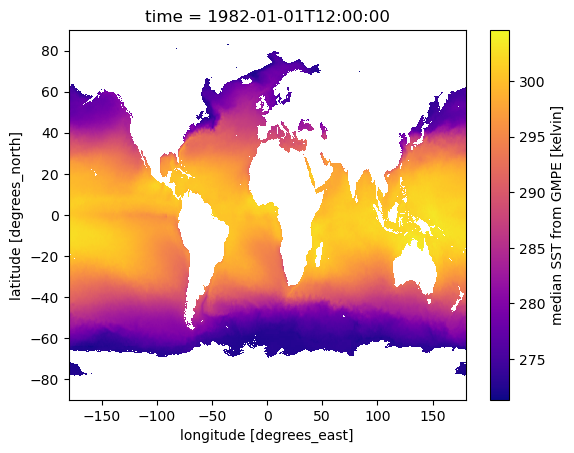

In [6]:
time_index = 0

sst_dataset.analysed_sst.isel(time=time_index).plot.imshow(cmap='plasma')

It might also be more convenient to look at just a spatial subset, e.g., the North Sea:

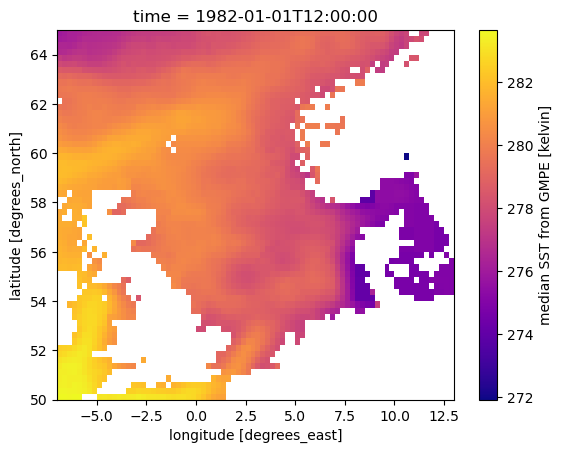

In [7]:
time_index = 0

sst_dataset.analysed_sst.isel(time=time_index).sel({'lat': slice(50, 65), 'lon': slice(-7, 13)}).plot.imshow(cmap='plasma')